Enter the stock symbol (e.g., AAPL): J
[*********************100%%**********************]  1 of 1 completed


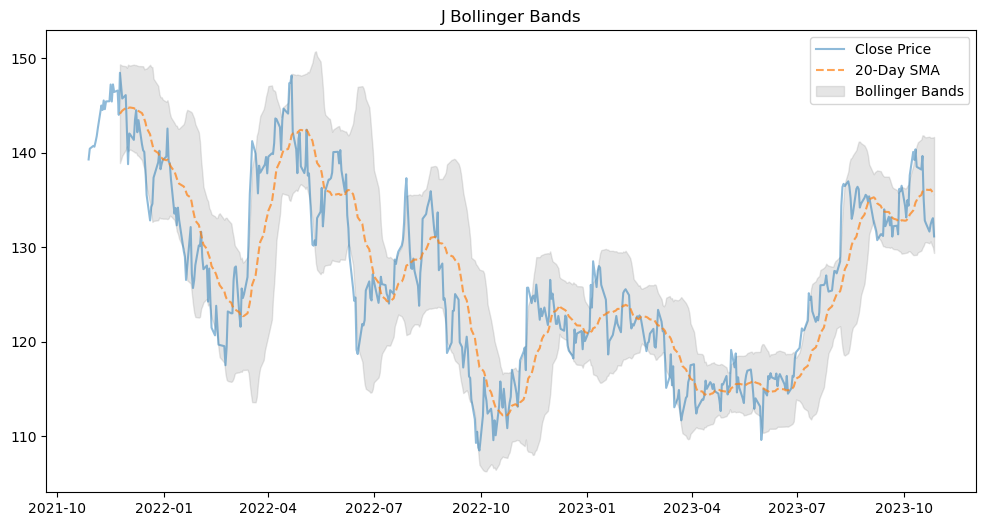

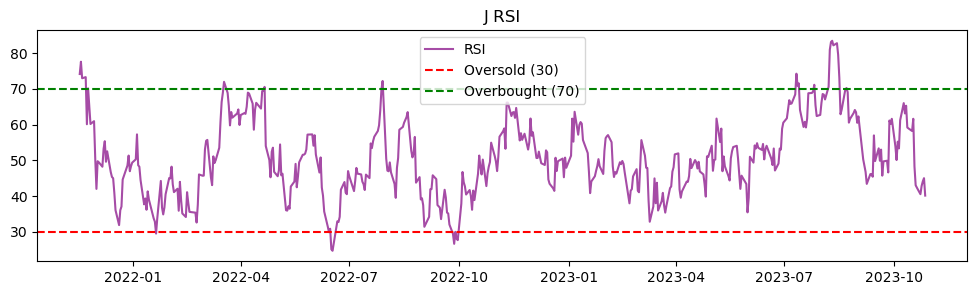

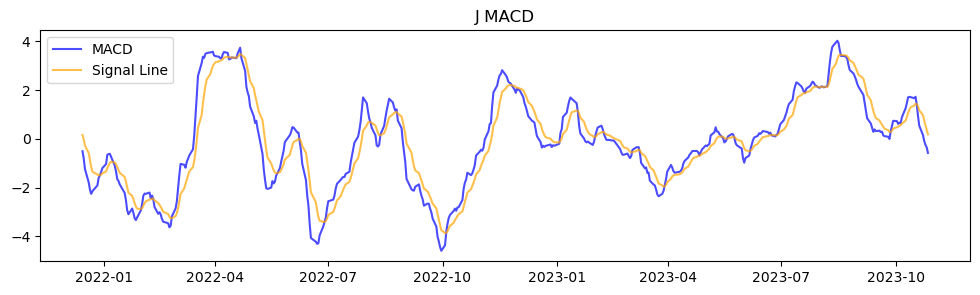

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import talib

# Get the stock symbol from the user
stock_symbol = input("Enter the stock symbol (e.g., AAPL): ")

# Download historical data
data = yf.download(stock_symbol, period='24mo', interval='1d')

# Calculate Bollinger Bands
data['SMA'] = data['Close'].rolling(window=20).mean()
data['Upper'] = data['SMA'] + 1.96 * data['Close'].rolling(window=20).std()
data['Lower'] = data['SMA'] - 1.96 * data['Close'].rolling(window=20).std()

# Calculate RSI
data['RSI'] = talib.RSI(data['Close'])

# Calculate MACD
data['MACD'], data['Signal'], _ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.title(f'{stock_symbol} Bollinger Bands')
plt.plot(data.index, data['Close'], label='Close Price', alpha=0.5)
plt.plot(data.index, data['SMA'], label='20-Day SMA', linestyle='--', alpha=0.7)
plt.fill_between(data.index, data['Upper'], data['Lower'], color='gray', alpha=0.2, label='Bollinger Bands')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(12, 3))
plt.title(f'{stock_symbol} RSI')
plt.plot(data.index, data['RSI'], label='RSI', alpha=0.7, color='purple')
plt.axhline(30, color='red', linestyle='--', label='Oversold (30)')
plt.axhline(70, color='green', linestyle='--', label='Overbought (70)')
plt.legend()
plt.show()

# Plot MACD and Signal Line
plt.figure(figsize=(12, 3))
plt.title(f'{stock_symbol} MACD')
plt.plot(data.index, data['MACD'], label='MACD', alpha=0.7, color='blue')
plt.plot(data.index, data['Signal'], label='Signal Line', alpha=0.7, color='orange')
plt.legend()
plt.show()


In [23]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
import talib

# Define the update_layout function
def update_layout(fig, title):
    fig.update_layout(title=title, xaxis_rangeslider_visible=True)
    fig.update_xaxes(rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=3, label='3m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='YTD', step='year', stepmode='todate'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    ))

# Get the stock symbol from the user
stock_symbol = input("Enter the stock symbol (e.g., AAPL): ")

# Download historical data
data = yf.download(stock_symbol, period='24mo', interval='1d')

# Calculate Bollinger Bands
data['SMA'] = data['Close'].rolling(window=20).mean()
data['Upper'] = data['SMA'] + 1.96 * data['Close'].rolling(window=20).std()
data['Lower'] = data['SMA'] - 1.96 * data['Close'].rolling(window=20).std()

# Calculate RSI
data['RSI'] = talib.RSI(data['Close'])

# Calculate MACD
data['MACD'], data['Signal'], _ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Create separate Plotly figures for Bollinger Bands, RSI, and MACD
fig_bollinger = go.Figure()

# Add Bollinger Bands
fig_bollinger.add_trace(go.Candlestick(x=data.index,
                                      open=data['Open'],
                                      high=data['High'],
                                      low=data['Low'],
                                      close=data['Close'],
                                      name='Close Price'))

fig_bollinger.add_trace(go.Scatter(x=data.index, y=data['SMA'], mode='lines', name='20-Day SMA'))
fig_bollinger.add_trace(go.Scatter(x=data.index, y=data['Upper'], mode='lines', line=dict(color='gray'), name='Upper Bollinger Band'))
fig_bollinger.add_trace(go.Scatter(x=data.index, y=data['Lower'], mode='lines', line=dict(color='gray'), name='Lower Bollinger Band'))

fig_rsi = go.Figure()

# Add RSI
fig_rsi.add_trace(go.Scatter(x=data.index, y=data['RSI'], mode='lines', name='RSI'))
fig_rsi.add_shape(go.layout.Shape(
    type='line',
    x0=data.index.min(),
    x1=data.index.max(),
    y0=70,
    y1=70,
    line=dict(color='red', width=2),
    name='Overbought (RSI > 70)'
))
fig_rsi.add_shape(go.layout.Shape(
    type='line',
    x0=data.index.min(),
    x1=data.index.max(),
    y0=30,
    y1=30,
    line=dict(color='green', width=2),
    name='Oversold (RSI < 30)'
))

fig_macd = go.Figure()

# Add MACD
fig_macd.add_trace(go.Scatter(x=data.index, y=data['MACD'], mode='lines', name='MACD'))
fig_macd.add_trace(go.Scatter(x=data.index, y=data['Signal'], mode='lines', name='Signal Line'))

# Update the layout for all figures
update_layout(fig_bollinger, f'{stock_symbol} Bollinger Bands')
update_layout(fig_rsi, f'{stock_symbol} RSI')
update_layout(fig_macd, f'{stock_symbol} MACD')

# Show the interactive graphs
fig_bollinger.show()
fig_rsi.show()
fig_macd.show()


Enter the stock symbol (e.g., AAPL): AAPL
[*********************100%%**********************]  1 of 1 completed
